# GRIP-THE SPARKS FOUNDATION

BATCH(APRIL21)

### Author - Nikita Koshti

##  Exploratory Data Analysis - Sports(IPL)

### Task - 5 Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

#### To predict

In this modal we have to find out the most successful teams, players and factors contributing win or loss of a team.

### given data set :-  https://bit.ly/34SRn3b


### Import required libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data

In [67]:
matches = pd.read_csv('matches.csv')
deliveries= pd.read_csv('deliveries.csv')

### Read Match Data

In [68]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Read Delivery Data

In [69]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Information of Match dataset

In [70]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [71]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Describe Match Dataset

In [72]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Number of Ipl data we have

In [73]:
len(matches['season'].unique())

12

We have data of 12 ipl Seasons

### Checking Null or Missing Values

In [74]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

As we see above there are missing values in 'city','winner','player_of_match and 'umpire' category. We need to treat these missing values

### Treatment of Missing Values

In [75]:
matches[matches.city.isnull()][['city','date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


For treatment of missing values, we find out the dates of te matches and then search for missing values in google. Like for example to replace missing values in city columns we can find out the place when match happened from google and then fill in the missing values.

In [76]:
matches.city=matches.city.fillna('Dubai')
matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Noww we can see in city, there is no null value.

### Similar treatment for other variables as well

In [77]:
matches[matches.winner.isnull()][['result','winner','player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


Here we can see that values are NaN for matches with no result.This is well justified. So we do not need to worry about these. we can directly remove them.

### Make plot for 'Most Wicket-Taking Bowler'

<AxesSubplot:title={'center':'Most Wicket-Taking Bowlers'}, xlabel='bowler', ylabel='No. of Wickets'>

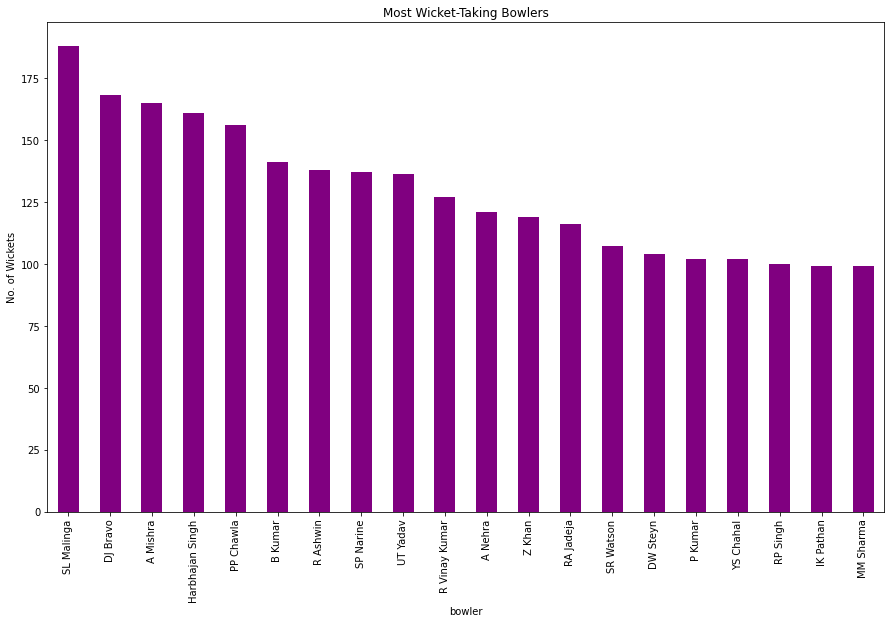

In [79]:
plt.figure(figsize=[15,9])
plt.title('Most Wicket-Taking Bowlers')
plt.ylabel('No. of Wickets')
deliveries.groupby('bowler').player_dismissed.count().sort_values(ascending=False)[:20].plot(kind='bar', color='purple')

The above chart clearly shows that Lasith Malinga is the most wicket-taking bowler of all time. Hence, he may has a big contribution in Mumbai Indians winning a match.
He is followed by DJ Bravo, Amit Mishra and so on.

There are 15 Indian bowlers among the TOP-20

### Make plot for 'Most Run-Scoring Batsman'

<AxesSubplot:title={'center':'Most Run-Scoring Batsman'}, xlabel='batsman', ylabel='Total Runs scored'>

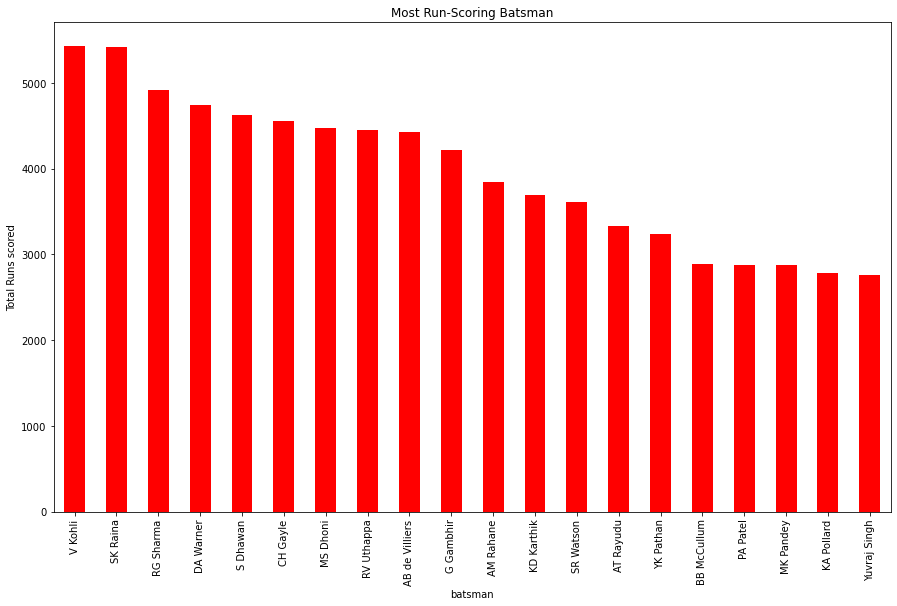

In [80]:
plt.figure(figsize=[15,9])
plt.title('Most Run-Scoring Batsman')
plt.ylabel('Total Runs scored')
deliveries.groupby('batsman').batsman_runs.sum().sort_values(ascending=False)[:20].plot(kind='bar', color='red')

The above chart clearly shows that Virat Kohli scored maximum number of runs all seasons combined.
This indicates that he is in a good form and will continue to score runs for his team Royal Challengers Banglore.

He is followed by Suresh Raina, Rohit Sharma and so on.
The Top-3 positions are occupied by Indian batsman.

### Sort value for top scores

In [81]:
top_scores = deliveries.groupby(["match_id", "batsman","batting_team", "bowling_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values('batsman_runs', ascending=False)[:10]

,match_id,batsman,batting_team,bowling_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,Pune Warriors,175
900,60,BB McCullum,Kolkata Knight Riders,Royal Challengers Bangalore,158
8426,562,AB de Villiers,Royal Challengers Bangalore,Mumbai Indians,133
10149,7935,RR Pant,Delhi Daredevils,Sunrisers Hyderabad,130
9257,620,AB de Villiers,Royal Challengers Bangalore,Gujarat Lions,129
5585,372,CH Gayle,Royal Challengers Bangalore,Delhi Daredevils,128
3135,206,M Vijay,Chennai Super Kings,Rajasthan Royals,127
529,36,DA Warner,Sunrisers Hyderabad,Kolkata Knight Riders,126
7752,516,V Sehwag,Kings XI Punjab,Chennai Super Kings,122
10417,7953,SR Watson,Chennai Super Kings,Sunrisers Hyderabad,121


The above result is used to get information related to highest runs scored by a batsman in an inning.

It can easily be concluded that Chris Gayle scored the highest runs in an inning i.e. 175 runs, followed
by Brandon McCullum (158 runs), AB de Villiers (133 runs) and so on.

### Make plot on 'Teams with Total Number of Matches Won'

<AxesSubplot:title={'center':'Teams with Total No. of Matches won'}, ylabel='No. of Matches Won'>

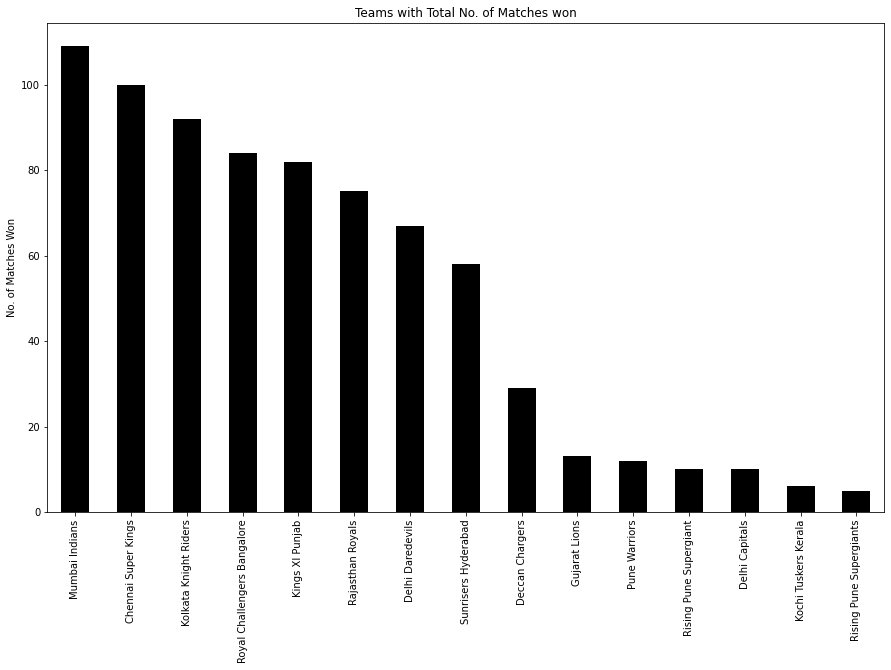

In [82]:
plt.figure(figsize=[15,9])
plt.title('Teams with Total No. of Matches won')
plt.ylabel('No. of Matches Won')
matches.winner.value_counts().plot(kind='bar', color='black')

The above result is used to get information related to the total number of matches won by a team.

It can easily be concluded that Mumbai Indians won the maximum number of matches among all the
teams, followed by Chennai Super Kings, Kolkata Knight Riders and so on.

<BarContainer object of 2 artists>

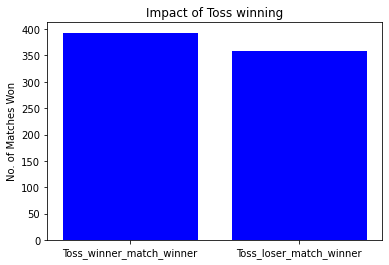

In [83]:
plt.title('Impact of Toss winning')
plt.ylabel('No. of Matches Won')
result = ['Toss_winner_match_winner', 'Toss_loser_match_winner']
count = [matches[matches.toss_winner == matches.winner].winner.count(), matches[matches.toss_winner != matches.winner].winner.count()]
plt.bar(result, count, color='blue')

Above chart is used to show the impact of winning a toss over winning a match.

From results, it is clear that winning a toss alone does not greatly affect the result of a match as the
difference between matches won by winning the toss and by loosing the toss is only 34.

<BarContainer object of 2 artists>

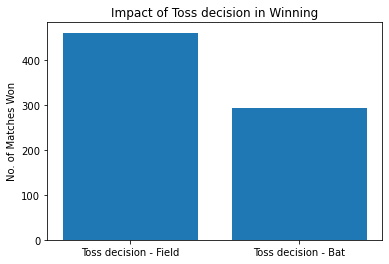

In [48]:
plt.title('Impact of Toss decision in Winning')
plt.ylabel('No. of Matches Won')
result1 = ['Toss decision - Field', 'Toss decision - Bat']
count1 = [matches[matches.toss_decision == 'field'].winner.count(), matches[matches.toss_decision == 'bat'].winner.count()]
plt.bar(result1, count1)

Above chart is used to show the impact of toss decision over winning a match.

From results, it is clear that teams that choose to field first has higher chance of winning
the match than the teams choosing to bat first.

### Make plot on 'Match hosting cities'

<AxesSubplot:title={'center':'Match hosting Cities'}, ylabel='No. of Matches'>

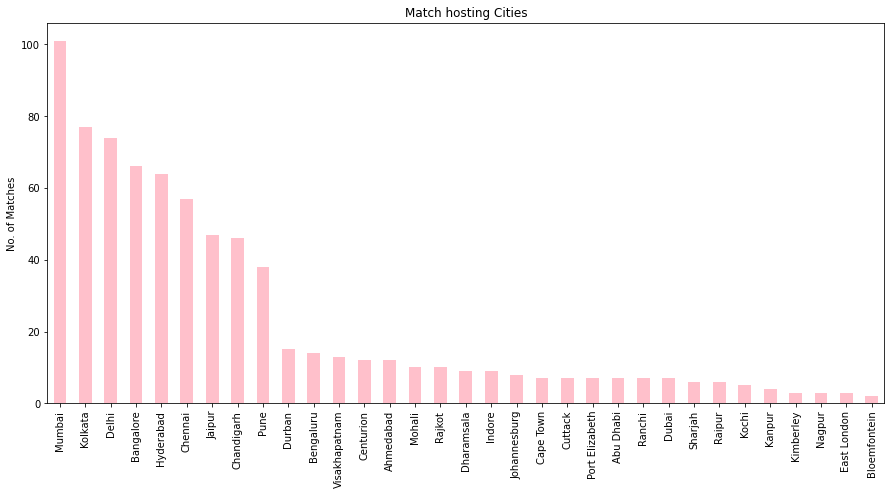

In [84]:
plt.figure(figsize=[15,7])
plt.title('Match hosting Cities')
plt.ylabel('No. of Matches')
matches.city.value_counts().plot(kind='bar', color='pink')

Above chart shows the number of IPL matches played in a city.

Mumbai has hosted the maximum number of IPL matches at the world famous 'Wankhede Stadium',
followed by Kolkata, Delhi and so on.

Some cities are from outside India as the matches could not be conducted in India due to some reasons.

### Make Plot on 'Match hosting Venues'

<AxesSubplot:title={'center':'Match hosting Venues'}, ylabel='No. of Matches'>

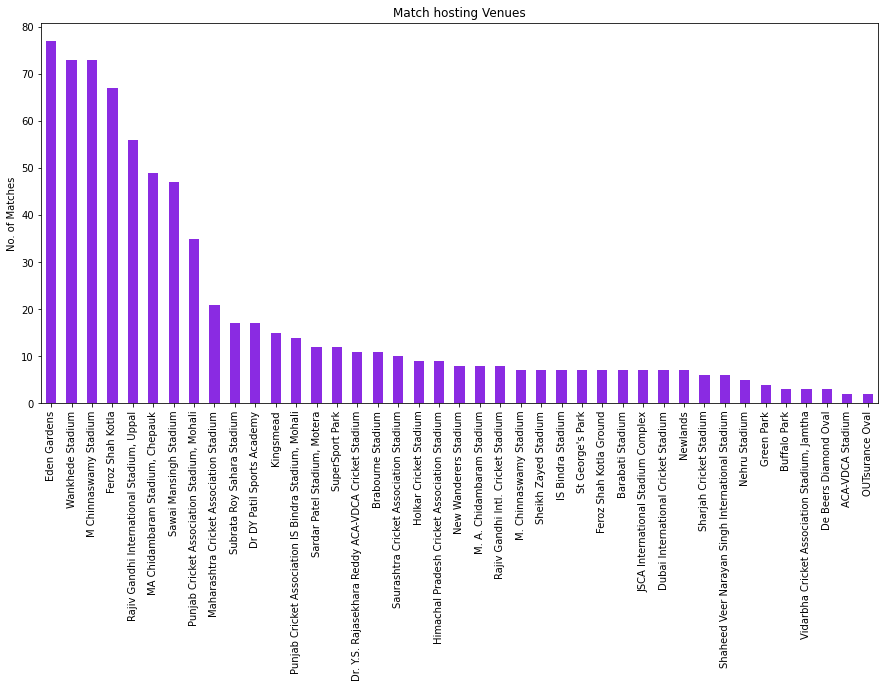

In [85]:
plt.figure(figsize=[15,7])
plt.title('Match hosting Venues')
plt.ylabel('No. of Matches')
matches.venue.value_counts().plot(kind='bar', color='blueviolet')

Above chart shows the number of IPL matches played at a venue.

Eden Gardens has hosted the maximum number of IPL matches situated in West Bengal, followed
by M Chinnaswamy Stadium (Karnataka), Wankhede Stadium (Maharashtra) and so on.

Some stadiums are from outside India as the matches could not be conducted in India due to some reasons.

### Make plot on 'Player of the Match Won'

<AxesSubplot:title={'center':'Player of the Match Won'}>

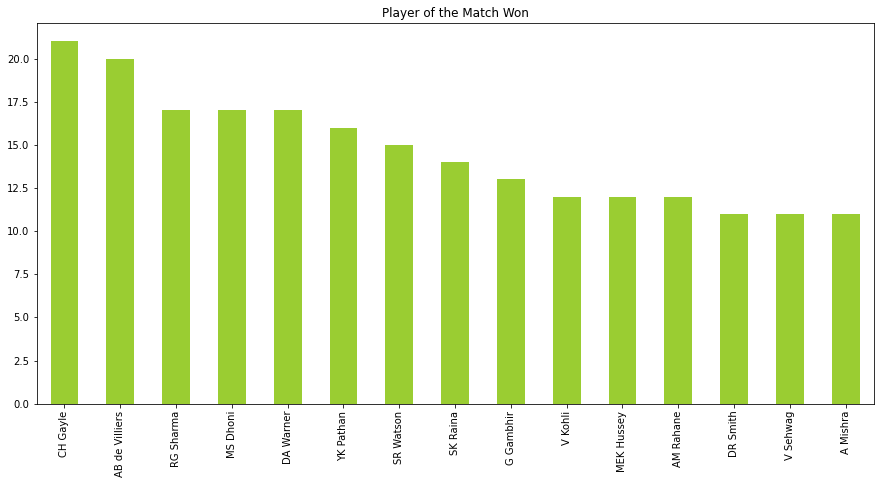

In [86]:
plt.figure(figsize=[15,7])
plt.title('Player of the Match Won')
matches.player_of_match.value_counts()[:15].plot(kind='bar', color='yellowgreen')

Above chart shows the number of times a player has been selected as the 'Player of the Match'.

Chris Gayle has became 'Player of the Match' maximum number of times which clearly indicates his
popularity among all the team selectors during the auction.

There are 8 Indians among the Top-15 players.

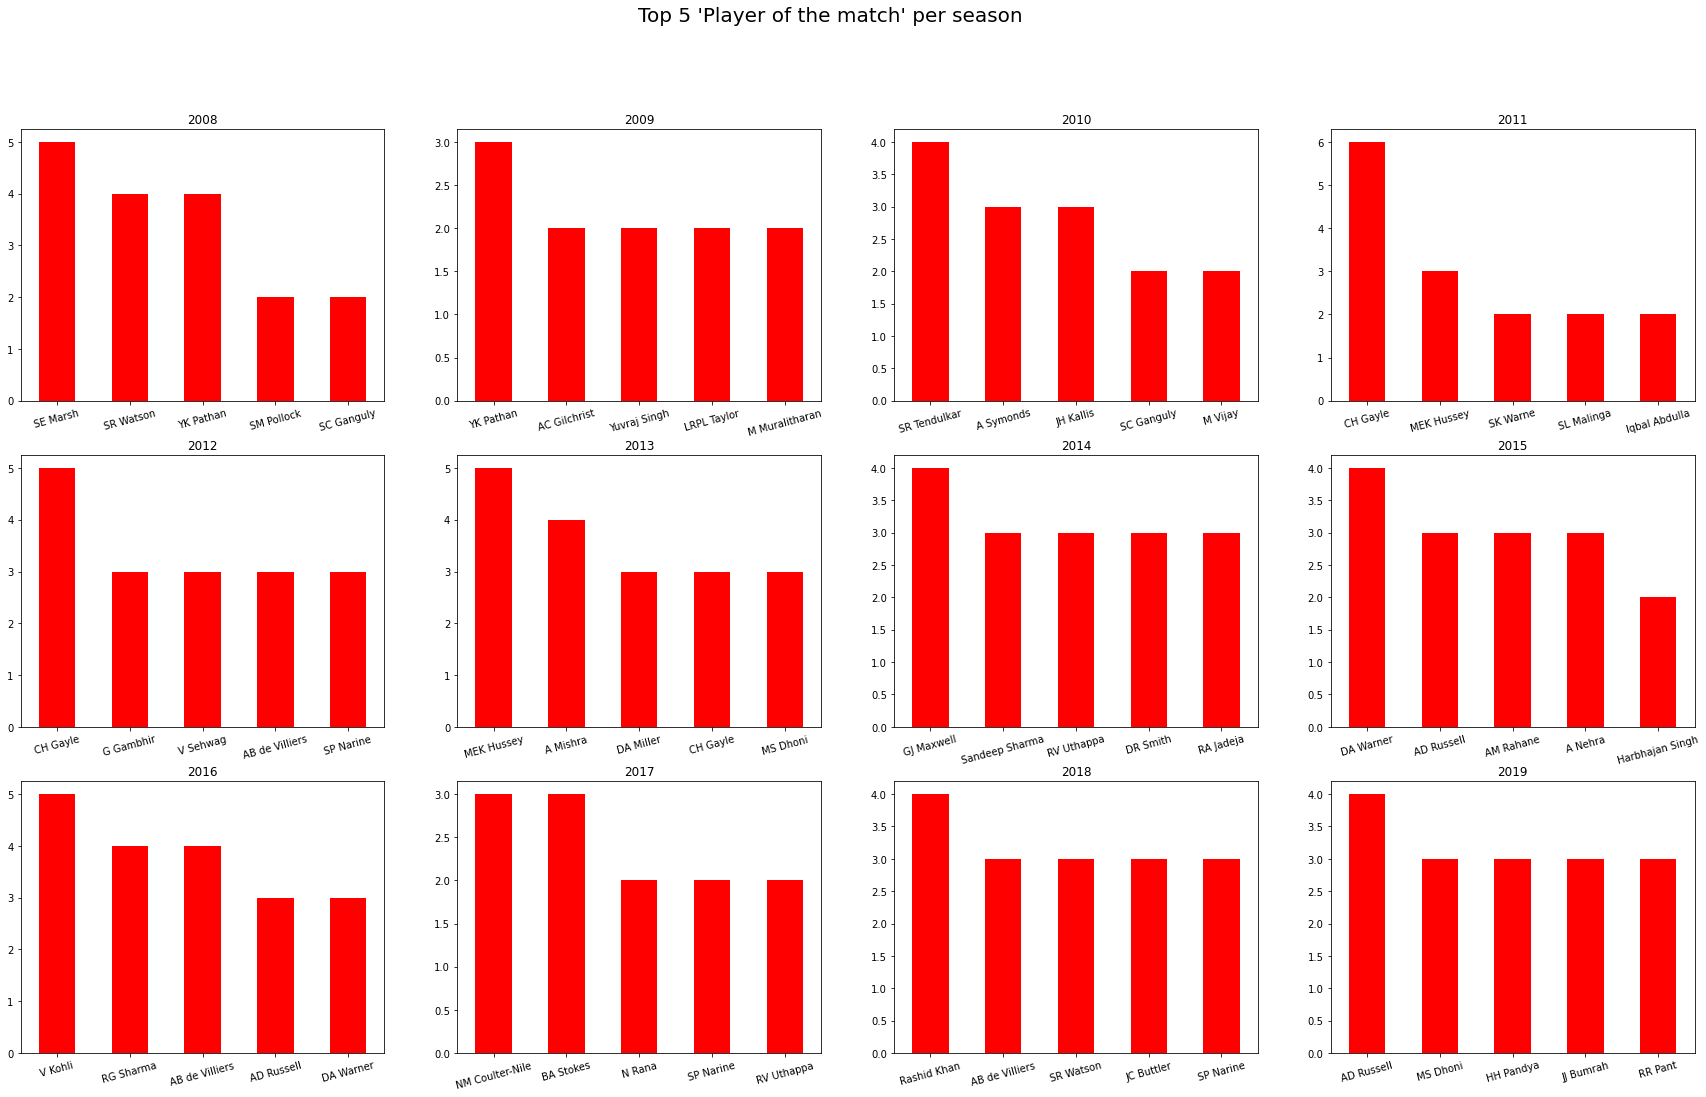

In [62]:
plt.figure(figsize=[30,17])
plt.suptitle("Top 5 'Player of the match' per season", fontsize=20)
season1 = 2008
for i in range(1,13):
        plt.subplot(3,4,i)
        plt.title(season1)
        matches[matches.season == season1].player_of_match.value_counts()[:5].plot(kind='bar',color='red')
        plt.xticks(rotation = 15)
        season1 += 1
plt.show()

From the above charts, we can easily see the top players from each season.
Such analysis helps the team selectors to choose the players wisely during the auction.

<AxesSubplot:title={'center':'Number of Fours hit'}, xlabel='batsman,total_runs'>

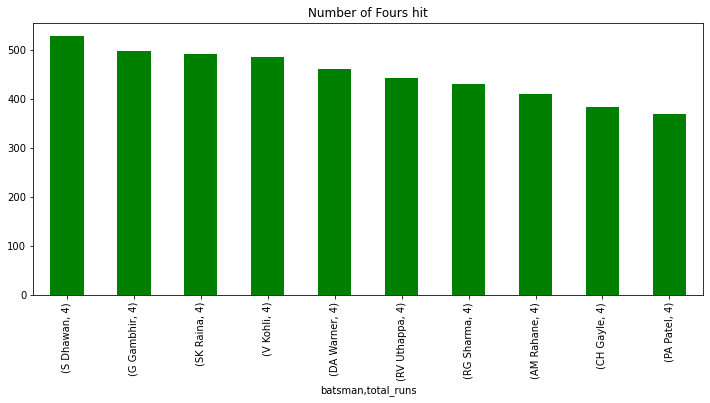

In [64]:
plt.figure(figsize=[12,5])
plt.title('Number of Fours hit')
fours = deliveries[deliveries.total_runs == 4].groupby('batsman')
fours.total_runs.value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='green')

Shikhar Dhawan has hit maximum number of fours of all time.

There are 8 Indians among Top-10

<AxesSubplot:title={'center':'Number of Sixes hit'}, xlabel='batsman,total_runs'>

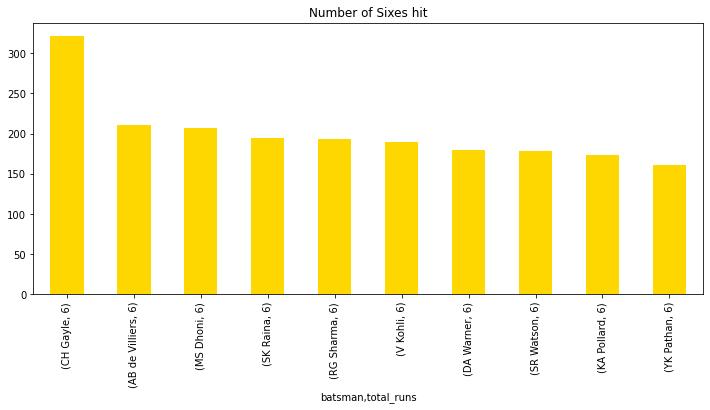

In [65]:
plt.figure(figsize=[12,5])
plt.title('Number of Sixes hit')
sixes = deliveries[deliveries.total_runs == 6].groupby('batsman')
sixes.total_runs.value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='gold')

Chris Gayle has hit maximum number of sixes of all time.

There 5 Indians among Top-10 starting from MS Dhoni at 3rd position.

## Thank You!